# Homework 4: Data Visualization
- **Name**:  [your full name goes here.  remove the brackets.]
- **UB Username**: [your UB username goes here.  remove the brackets]
- **UB Person Number**:  [your UB person number goes here.  remove the brackets]

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import csv
import pandas as pd
import seaborn as sns
#file = pd.read_csv("scatter_data.csv")
#print(file)
#from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


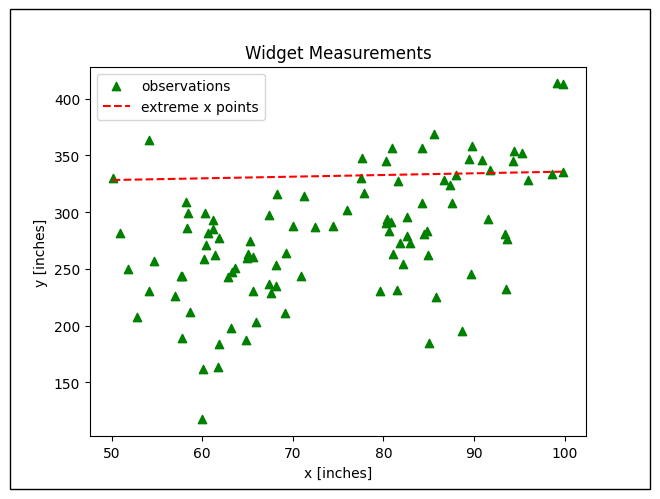

In [2]:
# It's OK to break up your code into multiple cells.
data = []
with open("scatter_data.csv") as f:
    for line in f:
        if not line.startswith("%"):
            x, y = line.split(",")
            data.append((float(x), float(y)))
x = [d[0] for d in data]
y = [d[1] for d in data]

plt.scatter(x, y, marker="^", color="green", label="observations")
xmin, xmax = min(x), max(x)
plt.plot([xmin, xmax], [y[0], y[-1]], linestyle="--", color="red", label="extreme x points")

plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
plt.legend()
plt.show()

### Problem 2 - Histogram

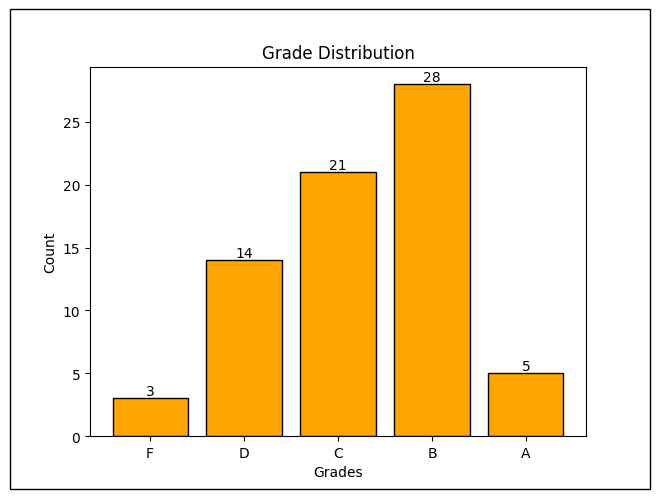

In [3]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
grade = []
with open("student_grades.csv") as f:
    for line in f:
        if not line.startswith("%"):
            x, y = line.split(",")
            grade.append(float(y))
#print(len(grade))
#print(grade)
dic = {'F':0,'D':0,'C':0,'B':0,'A':0}
for i in grade:
    if i >=90 and i <=100:
        dic['A'] +=1
    elif i >= 80 and i <90:
        dic['B'] +=1
    elif i >=70 and i < 80:
        dic['C'] +=1
    elif i >= 60 and i < 70:
        dic['D'] +=1
    elif i < 60:
        dic['F']+=1
#print(dic)
#print(dic.values())
grade_labels = list(dic.keys())
grade_counts = list(dic.values())

plt.bar(grade_labels, grade_counts, color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(grade_labels[i], count, str(count), ha='center', va='bottom')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.title('Grade Distribution')
fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
plt.show()

In [4]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

/var/folders/l4/2z8qxp2j6hx0nm60y2g1q9140000gn/T/ipykernel_49337/402119123.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heuristic_ofv.loc[:, 'Optimality Gap'] = ((optimal_ofv[heuristic_ofv['Problem'].values].values - heuristic_ofv['Value'].values) / optimal_ofv[heuristic_ofv['Problem'].values].values) * 100


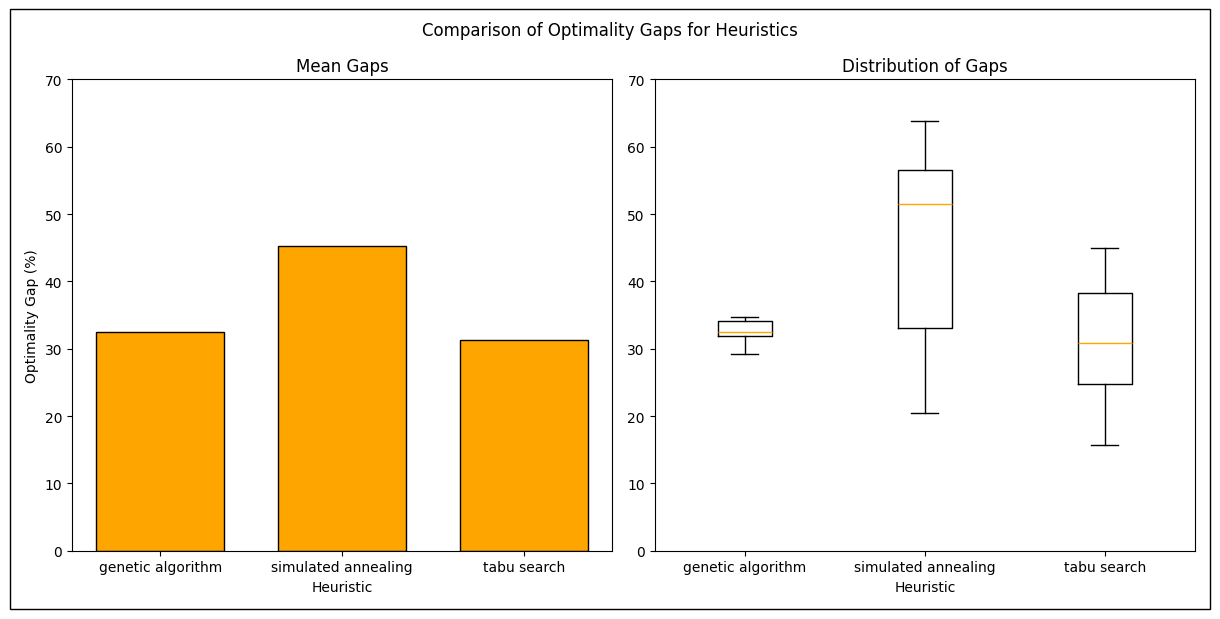

In [5]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import numpy as np
data = pd.read_csv('solution_data.csv', comment='%', header=None)
col_names = ['Problem', 'SolnMethod', 'Value']
data = pd.DataFrame(data)
data.columns = col_names

optimal_ofv = data[data['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()

heuristic_ofv = data[data['SolnMethod'] != 'optimal']
#heuristic_values['Optimality Gap'] = ((optimal_values[heuristic_values['Problem'].values].values - heuristic_values['Value'].values) / optimal_values[heuristic_values['Problem'].values].values) * 100
heuristic_ofv.loc[:, 'Optimality Gap'] = ((optimal_ofv[heuristic_ofv['Problem'].values].values - heuristic_ofv['Value'].values) / optimal_ofv[heuristic_ofv['Problem'].values].values) * 100


barplot_data = pd.DataFrame({
    'Heuristic': heuristic_ofv['SolnMethod'],
    'Optimality Gap': heuristic_ofv['Optimality Gap']
})

heuristics= ['genetic algorithm', 'simulated annealing', 'tabu search']
average_gaps = barplot_data[barplot_data['Heuristic'].isin(heuristics)]

average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

x = range(len(average_gaps))
axes[0].bar(x, average_gaps['Optimality Gap'], color='orange', edgecolor='black',width=0.7)
axes[0].set_xlabel("Heuristic")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
axes[0].set_xticks(x)
axes[0].set_xticklabels(average_gaps['Heuristic'])
axes[0].set_ylim([0, 70])

plt.subplots_adjust(wspace=1)

boxplot_data = [barplot_data[barplot_data['Heuristic'] == 
                             heuristic]['Optimality Gap'] for heuristic in heuristics]
axes[1].boxplot(boxplot_data, labels=heuristics, medianprops={'color': 'orange'})
axes[1].set_xlabel("Heuristic")
axes[1].set_title("Distribution of Gaps")
axes[1].set_ylim(axes[0].get_ylim())
axes[1].set_ylim([0, 70])

fig = plt.gcf()
ax = plt.gca()
rect = patches.Rectangle((0, 0), 1, 1, transform=fig.transFigure, linewidth=1, edgecolor='black', facecolor='none', zorder=10)
fig.patches.extend([rect])
plt.tight_layout()
plt.show()

In [6]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  [include a link to the matplotlib or Seaborn example.  remove the brackets]
- **URL of Sample Data**:  [include a link to the sample data you're using.  remove the brackets]

In [7]:
#URL of Example Code:https://matplotlib.org/stable/gallery/index.html
#https://matplotlib.org/stable/gallery/statistics/histogram_features.html#sphx-glr-gallery-statistics-histogram-features-py
#URL of Sample Data: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [8]:
# It's OK to break up your code into multiple cells.
df = pd.read_csv('StudentsPerformance.csv')
print(df)
df.isnull().sum()
#print (df.shape)
#x = df['math score']
#y = df['reading score']
#z = df['writing score']


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.


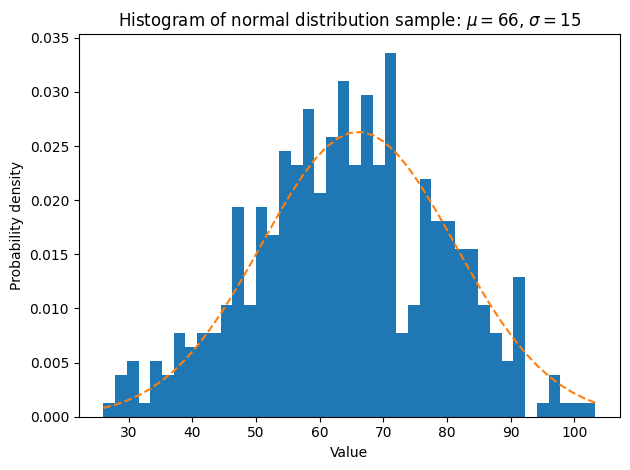

In [16]:
mu = df['math score'].mean()
mu
rng = np.random.default_rng(19680801)
sigma = df['math score'].std()
sigma
x = rng.normal(loc=mu, scale=sigma, size=420)

num_bins = 42

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

fig.tight_layout()
plt.show()

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 

In [17]:
'''
numeric_columns = df[['math score', 'reading score', 'writing score']]
sns.pairplot(numeric_columns)
plt.show()
'''

"\nnumeric_columns = df[['math score', 'reading score', 'writing score']]\nsns.pairplot(numeric_columns)\nplt.show()\n"

In [18]:
'''
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='test preparation course', hue='gender', palette='Set1')
plt.title('Count of Test Preparation Course Completion by Gender')
plt.xlabel('Test Preparation Course Completion')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='test preparation course', hue='gender', palette='Set1')\nplt.title('Count of Test Preparation Course Completion by Gender')\nplt.xlabel('Test Preparation Course Completion')\nplt.ylabel('Count')\nplt.legend(title='Gender')\nplt.show()\n"

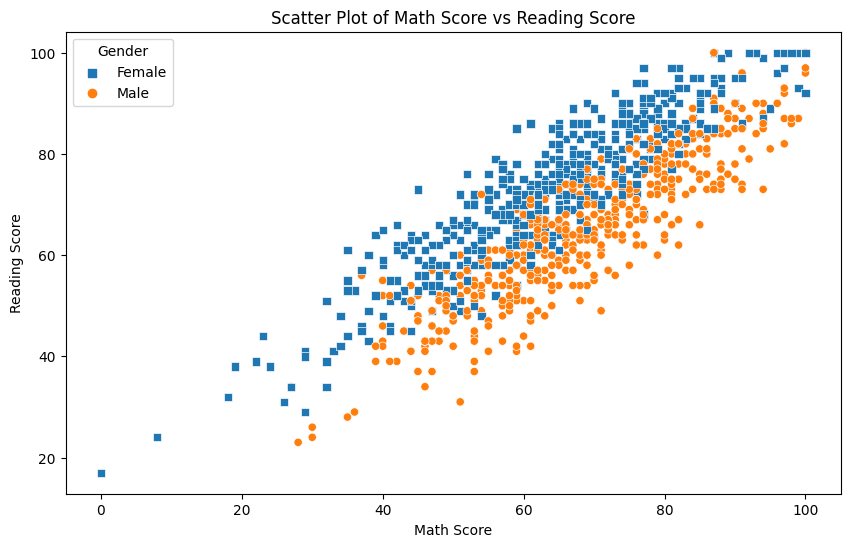

In [19]:
markers = {'male': 'o', 'female': 's'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', style='gender', markers=markers)
plt.title('Scatter Plot of Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = {'male': 'Male', 'female': 'Female'}
plt.legend(handles, [legend_labels[label] for label in labels], title='Gender')

plt.show()
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py